Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
반복: 1, 손실함수: 0.20118343830108643
반복: 2, 손실함수: 0.15017612278461456
반복: 3, 손실함수: 0.1316288560628891
반복: 4, 손실함수: 0.11814575642347336
반복: 5, 손실함수: 0.10825054347515106
반복: 6, 손실함수: 0.10004555433988571
반복: 7, 손실함수: 0.09653986990451813
반복: 8, 손실함수: 0.08688713610172272
반복: 9, 손실함수: 0.08616148680448532
반복: 10, 손실함수: 0.08032982051372528
반복: 11, 손실함수: 0.08023649454116821
반복: 12, 손실함수: 0.07875563204288483
반복: 13, 손실함수: 0.07278072834014893
반복: 14, 손실함수: 0.07700109481811523
반복: 15, 손실함수: 0.07205145061016083
반복: 16, 손실함수: 0.073143370449543
반복: 17, 손실함수: 0.071945920586586
반복: 18, 손실함수: 0.06900787353515625
반복: 19, 손실함수: 0.07121645659208298
반복: 20, 손실함수: 0.06745050102472305
반복: 21, 손실함수: 0.06790784746408463
반복: 22, 손실함수: 0.06470269709825516
반복: 23, 손실함수: 0.06448142230510712
반복: 24, 손실함수: 0.06318362057209015
반복: 25, 

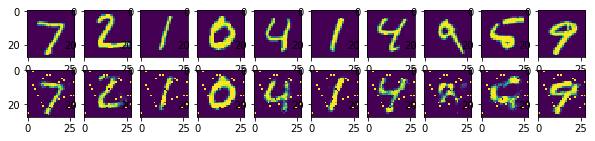

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True )

learning_rate= 0.02
training_epochs= 50
batch_size = 256
display_step = 1
examples_to_show =10
input_size = 784
hidden1_size = 256
hidden2_size = 128

x= tf.placeholder(tf.float32, shape= [None, input_size])

def build_autoencoder(x):
    #인코딩
    W1= tf.Variable(tf.random_normal(shape= [input_size, hidden1_size]))
    b1= tf.Variable(tf.random_normal(shape= [hidden1_size]))
    H1_output = tf.nn.sigmoid(tf.matmul(x,W1)+ b1)
    
    W2= tf.Variable(tf.random_normal(shape= [hidden1_size, hidden2_size]))
    b2= tf.Variable(tf.random_normal(shape= [hidden2_size]))
    H2_output = tf.nn.sigmoid(tf.matmul(H1_output,W2)+ b2)
    
    #특징들을 압축하고 다시 원본데이터를 만듦 
    
    #디코딩
    W3= tf.Variable(tf.random_normal(shape= [hidden2_size, hidden1_size]))
    b3= tf.Variable(tf.random_normal(shape= [hidden1_size]))
    H3_output = tf.nn.sigmoid(tf.matmul(H2_output,W3)+ b3)

    W4= tf.Variable(tf.random_normal(shape= [hidden1_size, input_size]))
    b4= tf.Variable(tf.random_normal(shape= [input_size]))
    reconstructed_x = tf.nn.sigmoid(tf.matmul(H3_output,W4)+ b4)
    
    return reconstructed_x

#압축된 특징들로 만들어진 새 데이터.
y_pred = build_autoencoder(x)

y_true = x

loss= tf.reduce_mean(tf.pow(y_true- y_pred, 2))
optimizer= tf.train.RMSPropOptimizer(learning_rate)
train_step = optimizer.minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs):
        total_batch = int(mnist.train.num_examples/ batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _,current_loss = sess.run([train_step, loss], feed_dict = {x: batch_xs})
        
        if epoch%display_step ==0:
            print("반복: {}, 손실함수: {}".format(epoch+1, current_loss))
    
    reconstructed_result = sess.run(y_pred, feed_dict={x:mnist.test.images[:examples_to_show]})
    f,a = plt.subplots(2,10, figsize = (10,2))
    for i in range(examples_to_show):
        a[0][i].imshow(np.reshape(mnist.test.images[i],(28,28)))
        a[1][i].imshow(np.reshape(reconstructed_result[i],(28,28)))
    f.savefig('reconstructed_mnist_image.png')
                    
        
    
    